# Chapter 5. 特征提取
数据是有特征的。从数据中提取特征，我们不但可以享受低熵带来的颅内高潮，在很多场景中还可以做出预测，应对未知的未来。



## 曲线拟合/回归
### 最小二乘法
最经典的回归算法没有之一。任何的多项式拟合都可以用最小二乘法进行计算。

它本身定义为 计算一个 $v$ 使得 $||b-Av||^2$ 最小。

例如我们要回归 $y=a+bx^2$ ，可以化为求
$\min ||y-\begin{pmatrix}1&x^2\end{pmatrix}\begin{pmatrix}a\\b\end{pmatrix}||$

[0.20925829 0.12013861] 0.4082665237440342 2 [93.25228799  1.7883749 ]


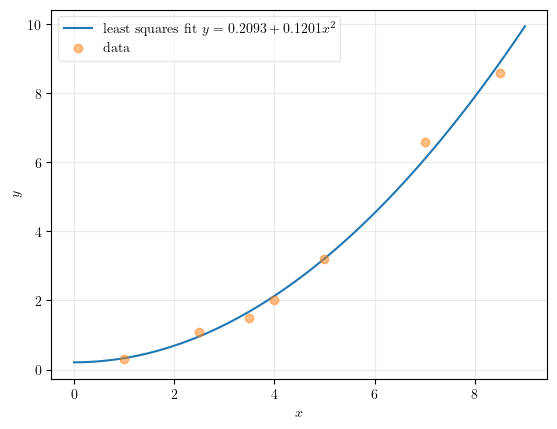

In [1]:
import numpy
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

x = numpy.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = numpy.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
A = x[:, numpy.newaxis]**[0, 2] # 升维，构建 A 矩阵
v, res, rnk, s = lstsq(A, y) # 解，残差，A 有效秩，A 奇异值
print(v, res, rnk, s)

# plot
plt.rcParams.update({"text.usetex": True, "font.family": "Times New Roman"})
xx = numpy.linspace(0, 9, 101)
yy = v[0] + v[1]*xx**2
plt.plot(xx, yy, label=f'least squares fit $y = {v[0]:.4f} + {v[1]:.4f}x^2$')
plt.plot(x, y, 'o', label='data', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(framealpha=0.5)
plt.grid(alpha=0.25)
plt.show()

### 非线性拟合
低效一点，很好用

[0.12013861 0.20925829] [[ 2.05511315e-05 -5.33595460e-04]
 [-5.33595460e-04  2.55191820e-02]]


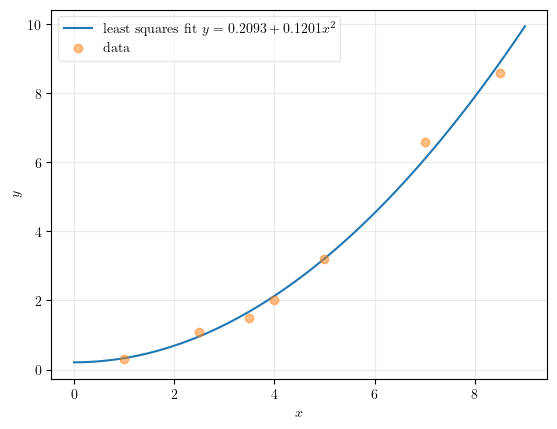

In [3]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

f=lambda x,a,b: a*x*x+b # curve_fit 会根据参数个数得知系数个数

x = numpy.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = numpy.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
v, cov = curve_fit(f, x, y) # 系数，协方差
print(v, cov)

# plot
plt.rcParams.update({"text.usetex": True, "font.family": "Times New Roman"})
xx = numpy.linspace(0, 9, 101)
yy = v[0]*xx**2+v[1]
plt.plot(xx, yy, label=f'least squares fit $y = {v[1]:.4f} + {v[0]:.4f}x^2$')
plt.plot(x, y, 'o', label='data', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(framealpha=0.5)
plt.grid(alpha=0.25)
plt.show()

## 时间序列分析 Time Series Analysis
这可是 3 学分的大课啊。我找到了一个 [教案](https://www.math.pku.edu.cn/teachers/lidf/course/atsa/atsanotes/html/_atsanotes/)。
要用就直接上这上面查吧。

Python 的 statmodels 里有 [对应模块](https://www.statsmodels.org/stable/tsa.html)，要用就问 Chatgpt 吧。